<a href="https://colab.research.google.com/github/Manel-MH/Sales-Predictions/blob/main/Project1_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 1 Part 1 

Mount Drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np

Load Data

In [3]:
#create a file name 
SalesPredictions = "/content/drive/MyDrive/Colab Notebooks/datasets/sales_predictions.csv"
#load data 
df_SalesPredictions = pd.read_csv(SalesPredictions)
#check head of data
print(df_SalesPredictions.head())
#check tail of data
print(df_SalesPredictions.tail())
#check data as df
df_SalesPredictions.head()

  Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 12 columns]
     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[5 rows x 12 columns]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Week 2 Part 2

Explore Data

Check columns datatype in df_SalesPredictions

In [4]:
#check info on df_SalesPredictions
df_SalesPredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Check shape of df_SalesPredictions

In [5]:
#check shape of df_SalesPredictions
#this output gives us numbers of (rows, columns)
df_SalesPredictions.shape

(8523, 12)

Check for and remove any duplicates in df_SalesPredictions

In [6]:
df_SalesPredictions.duplicated().any()

False

In [7]:
print('There are no duplicated rows (repeated data points) in this dataset.')

There are no duplicated rows (repeated data points) in this dataset.


Check for missing values

In [8]:
#is there missing values ?
#we always want .isnull().sum() to return zero
#.isnull().sum() != 0, we have missing values
df_SalesPredictions.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
print('There are 1463 missing values for the column Item_Weight and 2410 missing values for the column Outlet_Size.')

There are 1463 missing values for the column Item_Weight and 2410 missing values for the column Outlet_Size.


In [10]:
#is there irrelevant data/ mis-categorized data?
#run a .value_counts per column
Item_IdentifierIrr = df_SalesPredictions['Item_Identifier'].value_counts() 
Item_IdentifierIrr

FDW13    10
FDG33    10
FDV38     9
FDF52     9
FDU12     9
         ..
FDC23     1
DRF48     1
FDY43     1
FDE52     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
Item_WeightIrr = df_SalesPredictions['Item_Weight'].value_counts() 
Item_WeightIrr

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [12]:
Item_Fat_ContentIrr = df_SalesPredictions['Item_Fat_Content'].value_counts()
Item_Fat_ContentIrr 
print(Item_Fat_ContentIrr)             
Item_VisibilityIrr = df_SalesPredictions['Item_Visibility'].value_counts()
Item_VisibilityIrr 
print(Item_VisibilityIrr)                
Item_TypeIrr = df_SalesPredictions['Item_Type'].value_counts() 
Item_TypeIrr
print(Item_TypeIrr)                     
Item_MRPIrr = df_SalesPredictions['Item_MRP'].value_counts()
Item_MRPIrr
print(Item_MRPIrr)                         
Outlet_IdentifierIrr = df_SalesPredictions['Outlet_Identifier'].value_counts()
Outlet_IdentifierIrr 
print(Outlet_IdentifierIrr)               
Outlet_Establishment_YearIrr = df_SalesPredictions['Outlet_Establishment_Year'].value_counts()
Outlet_Establishment_YearIrr
print(Outlet_Establishment_YearIrr)        
Outlet_SizeIrr = df_SalesPredictions['Outlet_Size'].value_counts()
Outlet_SizeIrr 
print(Outlet_SizeIrr)                  
Outlet_Location_TypeIrr = df_SalesPredictions['Outlet_Location_Type'].value_counts()
Outlet_Location_TypeIrr 
print(Outlet_Location_TypeIrr)             
Outlet_TypeIrr = df_SalesPredictions['Outlet_Type'].value_counts()
Outlet_TypeIrr 
print(Outlet_TypeIrr)                     
Item_Outlet_SalesIrr = df_SalesPredictions['Item_Outlet_Sales'].value_counts()
Item_Outlet_SalesIrr 
print(Item_Outlet_SalesIrr)    

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008

Clean up the Item_Fat_Content

A .value.counts() on the column Item_Fat_Content turns up that the categories Low Fat or Regular are not reported uniformaly throughout the dataset. We need to have this uniform. We will change all entries into Low Fat or Regular where appropriate.

In [13]:
#we need only two categories Low Fat or Regular
#replacing values of cells in particular column
df_SalesPredictions['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [14]:
Item_Fat_ContentIrr = df_SalesPredictions['Item_Fat_Content'].value_counts()
Item_Fat_ContentIrr 
print(Item_Fat_ContentIrr)    

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Strategy to handle missing values

In [15]:
# continuous variable Item_Weight
# filling missing values 
# with mean column values
# create a variable mean and assign it the mean of the column Item_Weight
mean = df_SalesPredictions['Item_Weight'].mean()
df_SalesPredictions['Item_Weight'].fillna(value = mean, inplace=True)

In [16]:
# to check if I managed to handle missing values
# .isnull().sum() != 0, we have missing values
df_SalesPredictions.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
#categorical variable Outlet_Size
#Treat missing data as just another category : Unknown
df_SalesPredictions['Outlet_Size'].fillna('unknown', inplace=True)

In [18]:
Outlet_SizeIrr = df_SalesPredictions['Outlet_Size'].value_counts()
Outlet_SizeIrr 
print(Outlet_SizeIrr)

Medium     2793
unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


Some stats

In [19]:
#stats on the dataframe
#DESCRIBE - statistical summary of each column, such as count, column mean value, column standard deviation
#Note: item visibility needs to be multiplied by 100; the best column to look at stats summary is Item_Oulet_Sales
df_SalesPredictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Week 3
Statistical Analysis

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features

In [20]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

We will work with the numerical dtypes 

In [21]:
#what are the dtype float64, int64 (numerical)
#select only numerical dtype
#Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales
#the feature to be analyzed is the target variable Item_Outlet_Sales primarily

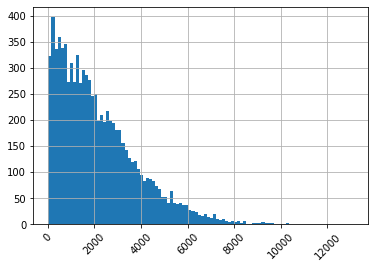

In [22]:
#histogram for Item_Outlet_Sales
df_SalesPredictions['Item_Outlet_Sales'].hist(bins = 100)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

This histogram showcases the outlet sales, the X axis is the number of sales and the Y axis is the outlet sales. The distribution is skewed to the right. This means that we need to report the dataset mean, median, mode which are all different compared to a normal distribution. 

In [23]:
#report mean
print(df_SalesPredictions['Item_Outlet_Sales'].mean())
print('The mean for the outlet sales column is $2181.30')
#report median
print(df_SalesPredictions['Item_Outlet_Sales'].median())
print('The median for the outlet sales column is $1794.30')
#report mode
print(df_SalesPredictions['Item_Outlet_Sales'].mode())
print('The mode for the outlet sales column is $958.75')

2181.2889135750365
The mean for the outlet sales column is $2181.30
1794.3310000000001
The median for the outlet sales column is $1794.30
0    958.752
dtype: float64
The mode for the outlet sales column is $958.75


Let's try to extract dtype numerical columns to compare them between themselves

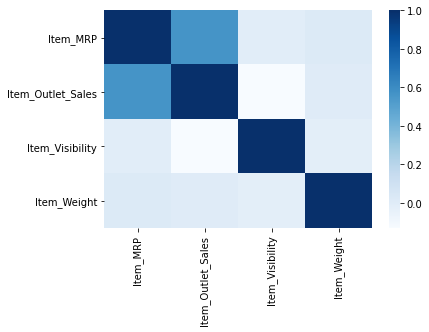

In [24]:
#select only dtype float64
dtype_numerical = df_SalesPredictions[['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight']]
#correlation between dtype_numerical and heatmap
corr = dtype_numerical.corr()
sns.heatmap(corr, cmap= 'Blues');

The heat map showcases that our outlet sales variable has a strong positive correlation with the Item_MRP variable which makes sense since the latter is the maximum retail price; the variable Item_weight is negatively correlated to the variable outlet sales as it seems the weigth has no influence on it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

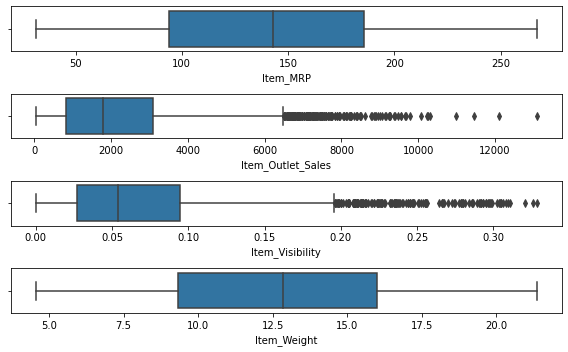

In [44]:
#boxplots for dtype_numerical
fig, axs = plt.subplots(4, figsize = (8,5))
plt1 = sns.boxplot(df_SalesPredictions['Item_MRP'], ax = axs[0]);
plt2 = sns.boxplot(df_SalesPredictions['Item_Outlet_Sales'], ax = axs[1]);
plt3 = sns.boxplot(df_SalesPredictions['Item_Visibility'], ax = axs[2]);
plt4 = sns.boxplot(df_SalesPredictions['Item_Weight'], ax = axs[3]);
plt.tight_layout()

Doing a boxplot analysis on the dtype_numerical columns showcases our finidngs that the outlet sales variable is skewed to the right with outliers spread to left. The visibilty of items seem to also be skewed to the right. since we replaced missing values in Item_Weight column with the mean value it seems correct that this boxplot is as is; 

Another interesting thing would be to see if there is some correlation between the size of the outlet and outlet sales

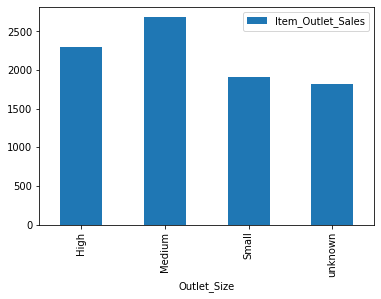

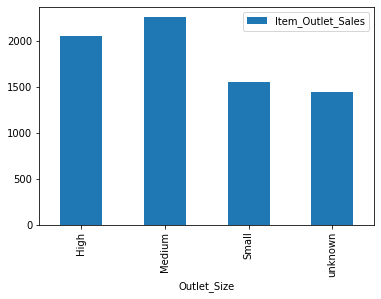

In [26]:
#use groupby
df_SalesPredictions.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].mean().plot(kind='bar');
df_SalesPredictions.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].median().plot(kind='bar');

Making a barchart to show the outlet sales for different outlet size, shows that Medium size outlet have the highest outlet sales.

Week 4 Vizualisation

 Numeric - Categorical Analysis

 let's do our analysis between categorical variable Outlet_Size vs the numerical variable Item_Outlet_Sales with a boxplot as well

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


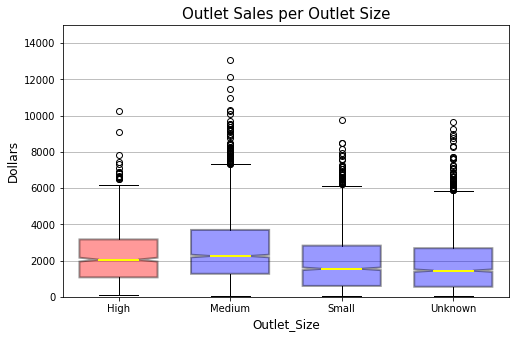

In [46]:
#plot the Item_Outlet_Sales for Outlet_Size
high = df_SalesPredictions.loc[df_SalesPredictions['Outlet_Size']=='High','Item_Outlet_Sales']
medium = df_SalesPredictions.loc[df_SalesPredictions['Outlet_Size']=='Medium','Item_Outlet_Sales']
small = df_SalesPredictions.loc[df_SalesPredictions['Outlet_Size']=='Small','Item_Outlet_Sales']
unknown = df_SalesPredictions.loc[df_SalesPredictions['Outlet_Size']=='unknown','Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([high, medium, small, unknown],
           notch = True,
           labels=['High', 'Medium', 'Small', 'Unknown'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Outlet_Size', fontsize = 12)
plt.ylabel('Dollars', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylim(bottom=0,top=15000)
plt.grid(axis = 'y')
plt.title('Outlet Sales per Outlet Size', fontsize = 15);

The boxplot visualization confirms the barcharts results based on median and mean; Medium size outlets do the most sales.